In [1]:
import torch
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt

from network.Transformer import Transformer

In [39]:
model = Transformer()
model.load_state_dict(torch.load('pretrained_model/Shinkai_net_G_float.pth'))
model.eval()
print('Model loaded!')

Model loaded!


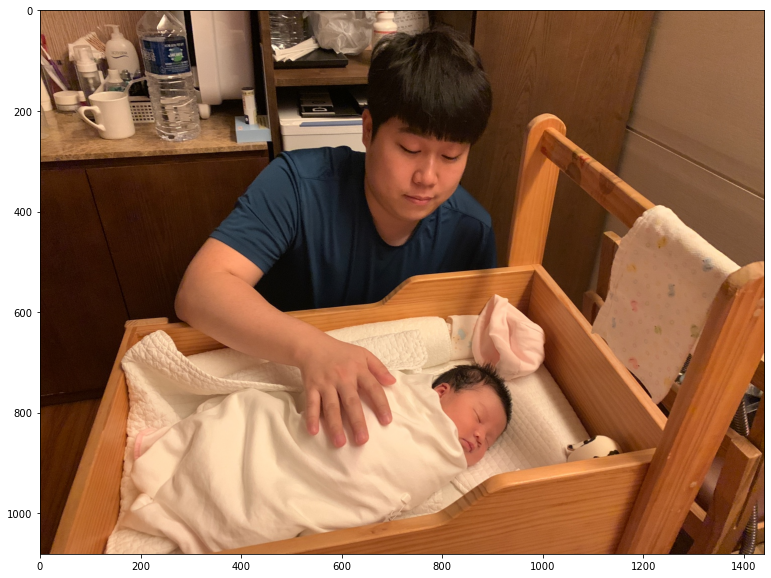

In [40]:
img_size = 450
img_path = 'test_img/4.jpeg'

img = cv2.imread(img_path)

T = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(img_size,2),
    transforms.ToTensor()
])

img_input = T(img).unsqueeze(0)

img_input = -1 + 2 * img_input

plt.figure(figsize=(16,10))
plt.imshow(img[:,:,::-1])

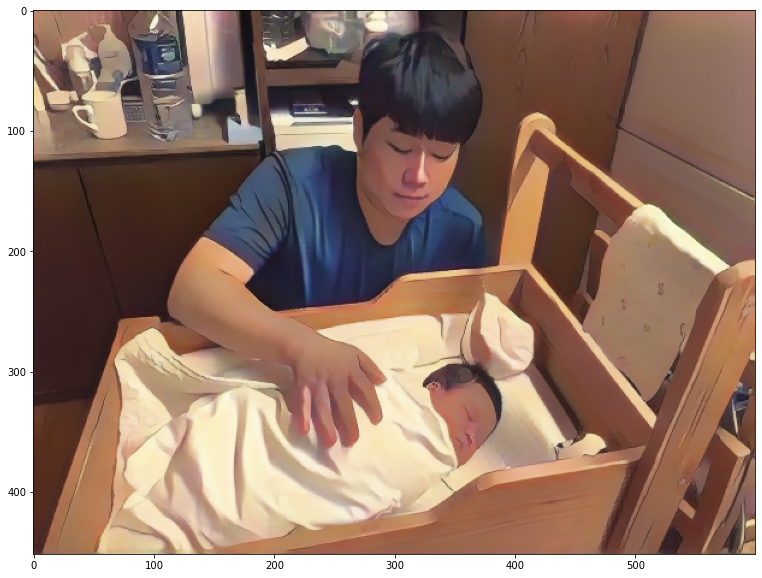

In [41]:
img_output = model(img_input)
img_output = (img_output.squeeze(0).detach().numpy() +1.) / 2.
img_output = img_output.transpose([1, 2, 0])
# pytorch(채널, 높이, 너비) / matplotlib(높이, 너비, 채널)

plt.figure(figsize=(16,10))
plt.imshow(img_output[:,:,::-1])